<a href="https://colab.research.google.com/github/luizdalla/myfinance/blob/main/04_correlation_ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment setup and imports

In [ ]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.3 MB/s 


In [ ]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Getting Tickers

Dowload csv with daily teoric wallet

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm


In [ ]:
df = pd.read_csv('IBOVDia_18-10-22.csv', encoding='latin-1', 
                 skiprows=1, decimal=',', thousands='.',
                 delimiter=';',
                 index_col=None,
                 )
df.columns = ['cod', 'stock', 'type', 'qt', 'part']
df

,cod,stock,type,qt,part
RRRP3,3R PETROLEUM,ON NM,2.004539e+08,0.380,NaN
ALPA4,ALPARGATAS,PN N1,2.027660e+08,0.195,NaN
ABEV3,AMBEV S/A,ON,4.386653e+09,3.057,NaN
AMER3,AMERICANAS,ON NM,5.960863e+08,0.492,NaN
ARZZ3,AREZZO CO,ON NM,6.035803e+07,0.280,NaN
...,...,...,...,...,...
VBBR3,VIBRA,ON NM,1.114443e+09,0.893,NaN
WEGE3,WEG,ON NM,1.481593e+09,2.327,NaN
YDUQ3,YDUQS PART,ON NM,2.960155e+08,0.179,NaN
Quantidade Teórica Total,NaN,NaN,1.005125e+11,100.000,NaN


## Getting tickers automatically

In [103]:
def get_tickers(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return (pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1].index + '.SA').to_list()

In [104]:
ibov_tickers = get_tickers('ibov')

In [105]:
ibov_tickers

['ABEV3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BRAP4.SA',
 'BRDT3.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BTOW3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'IGTA3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LAME4.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SULA11.SA',
 'SUZB3.SA',
 'TAEE11.SA',
 'TIMS3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'USIM

## Getting Stock Prices

In [106]:
def fix_col_names(df):
  return [col.rstrip('.SA') for col in df.columns]

In [107]:
prices = yf.download(ibov_tickers, period='1y')['Adj Close']
prices.columns = fix_col_names(prices)

[*********************100%***********************]  82 of 82 completed

8 Failed downloads:
- GNDI3.SA: No data found, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- LAME4.SA: No data found, symbol may be delisted
- BRDT3.SA: No data found, symbol may be delisted
- IGTA3.SA: No data found, symbol may be delisted
- LCAM3.SA: No data found, symbol may be delisted
- BTOW3.SA: No data found, symbol may be delisted
- VVAR3.SA: No data found, symbol may be delisted


In [108]:
prices.head()

,ABEV3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-18 00:00:00-03:00,15.033301,16.823448,34.360001,12.323631,29.967367,16.169092,19.000120,20.137388,9.614704,24.899408,...,33.732899,11.876898,35.506546,14.775815,15.065535,73.168800,43.392761,NaN,39.673882,26.807281
2021-10-19 00:00:00-03:00,14.571331,16.416748,30.799999,11.942096,28.497377,15.635375,18.412127,19.747272,9.364369,23.571438,...,33.306465,11.667530,34.108105,13.999653,14.606448,72.326515,42.888302,NaN,38.681053,24.981092
2021-10-20 00:00:00-03:00,14.831189,16.595299,30.680000,12.533476,29.027689,16.212845,19.043997,19.886599,9.030589,24.206133,...,33.501911,11.762697,33.185730,14.191299,14.063040,70.193344,42.972378,NaN,39.437965,24.752819
2021-10-21 00:00:00-03:00,14.571331,16.297716,29.690001,12.409475,27.743773,15.749122,18.649076,19.970194,8.659724,22.682873,...,33.182087,11.401061,32.293110,13.376807,13.266665,68.810905,42.299759,NaN,38.681053,23.819874
2021-10-22 00:00:00-03:00,14.436589,15.980292,29.190001,12.037479,26.897131,15.232899,17.946991,20.128098,8.622637,22.389938,...,32.711231,11.296377,31.618681,12.936025,13.444678,69.653191,41.627151,NaN,38.228870,22.480005


In [109]:
prices.tail()

,ABEV3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,...,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,VVAR3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-10 00:00:00-03:00,15.20,18.790001,17.389999,14.84,40.070000,16.760000,20.160000,28.230000,13.20,26.230000,...,40.040001,12.28,31.440001,12.43,7.65,73.989998,40.209999,NaN,34.270000,14.76
2022-10-11 00:00:00-03:00,14.99,19.020000,16.820000,14.35,39.110001,16.600000,20.110001,27.440001,13.25,26.219999,...,39.750000,12.22,30.299999,12.46,7.74,73.489998,40.009998,NaN,33.900002,14.53
2022-10-13 00:00:00-03:00,15.01,19.469999,16.110001,13.90,39.380001,16.379999,19.820000,28.170000,14.13,26.410000,...,39.070000,12.14,30.120001,12.23,7.68,72.180000,39.880001,NaN,33.470001,14.26
2022-10-14 00:00:00-03:00,14.83,19.090000,15.550000,13.89,39.160000,16.309999,19.690001,27.500000,13.23,26.250000,...,38.849998,11.96,29.799999,12.07,7.39,69.830002,39.389999,NaN,32.860001,13.13
2022-10-17 00:00:00-03:00,14.92,19.740000,16.500000,14.15,39.490002,16.430000,19.830000,28.040001,13.62,26.820000,...,38.720001,11.93,31.000000,12.43,7.30,70.669998,39.160000,NaN,33.610001,12.94


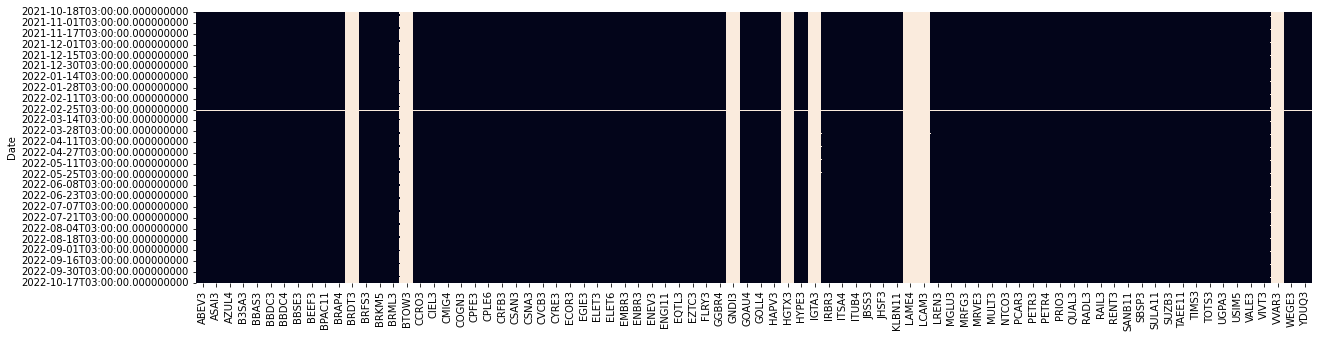

In [110]:
# Checking for nan
plt.figure(figsize=(20,5))
sns.heatmap(prices.isnull(), cbar=False);

In [111]:
# Cleaning nan
prices.dropna(thresh=30,  axis=1, inplace=True)

In [112]:
returns = prices.pct_change().dropna()

In [113]:
returns.tail()

,ABEV3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BEEF3,BPAC11,...,SUZB3,TAEE11,TIMS3,TOTS3,UGPA3,USIM5,VALE3,VIVT3,WEGE3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-10 00:00:00-03:00,-0.014267,0.034692,0.007532,0.002703,-0.014511,-0.009456,-0.015144,0.002486,0.041831,-0.003798,...,0.040095,0.002002,0.004910,0.007692,0.003228,-0.003906,-0.020130,0.004748,0.027586,-0.014686
2022-10-11 00:00:00-03:00,-0.013816,0.012241,-0.032777,-0.033019,-0.023958,-0.009547,-0.002480,-0.027984,0.003788,-0.000381,...,-0.012850,-0.007243,-0.004886,-0.036260,0.002413,0.011765,-0.006758,-0.004974,-0.010797,-0.015583
2022-10-13 00:00:00-03:00,0.001334,0.023659,-0.042212,-0.031359,0.006904,-0.013253,-0.014421,0.026603,0.066415,0.007246,...,0.003359,-0.017107,-0.006547,-0.005941,-0.018459,-0.007752,-0.017826,-0.003249,-0.012684,-0.018582
2022-10-14 00:00:00-03:00,-0.011992,-0.019517,-0.034761,-0.000719,-0.005587,-0.004273,-0.006559,-0.023784,-0.063694,-0.006058,...,0.000000,-0.005631,-0.014827,-0.010624,-0.013083,-0.037760,-0.032557,-0.012287,-0.018225,-0.079243
2022-10-17 00:00:00-03:00,0.006069,0.034049,0.061093,0.018718,0.008427,0.007358,0.007110,0.019636,0.029478,0.021714,...,0.034317,-0.003346,-0.002508,0.040268,0.029826,-0.012179,0.012029,-0.005839,0.022824,-0.014471


## Correlation

In [114]:
corr = returns.corr()

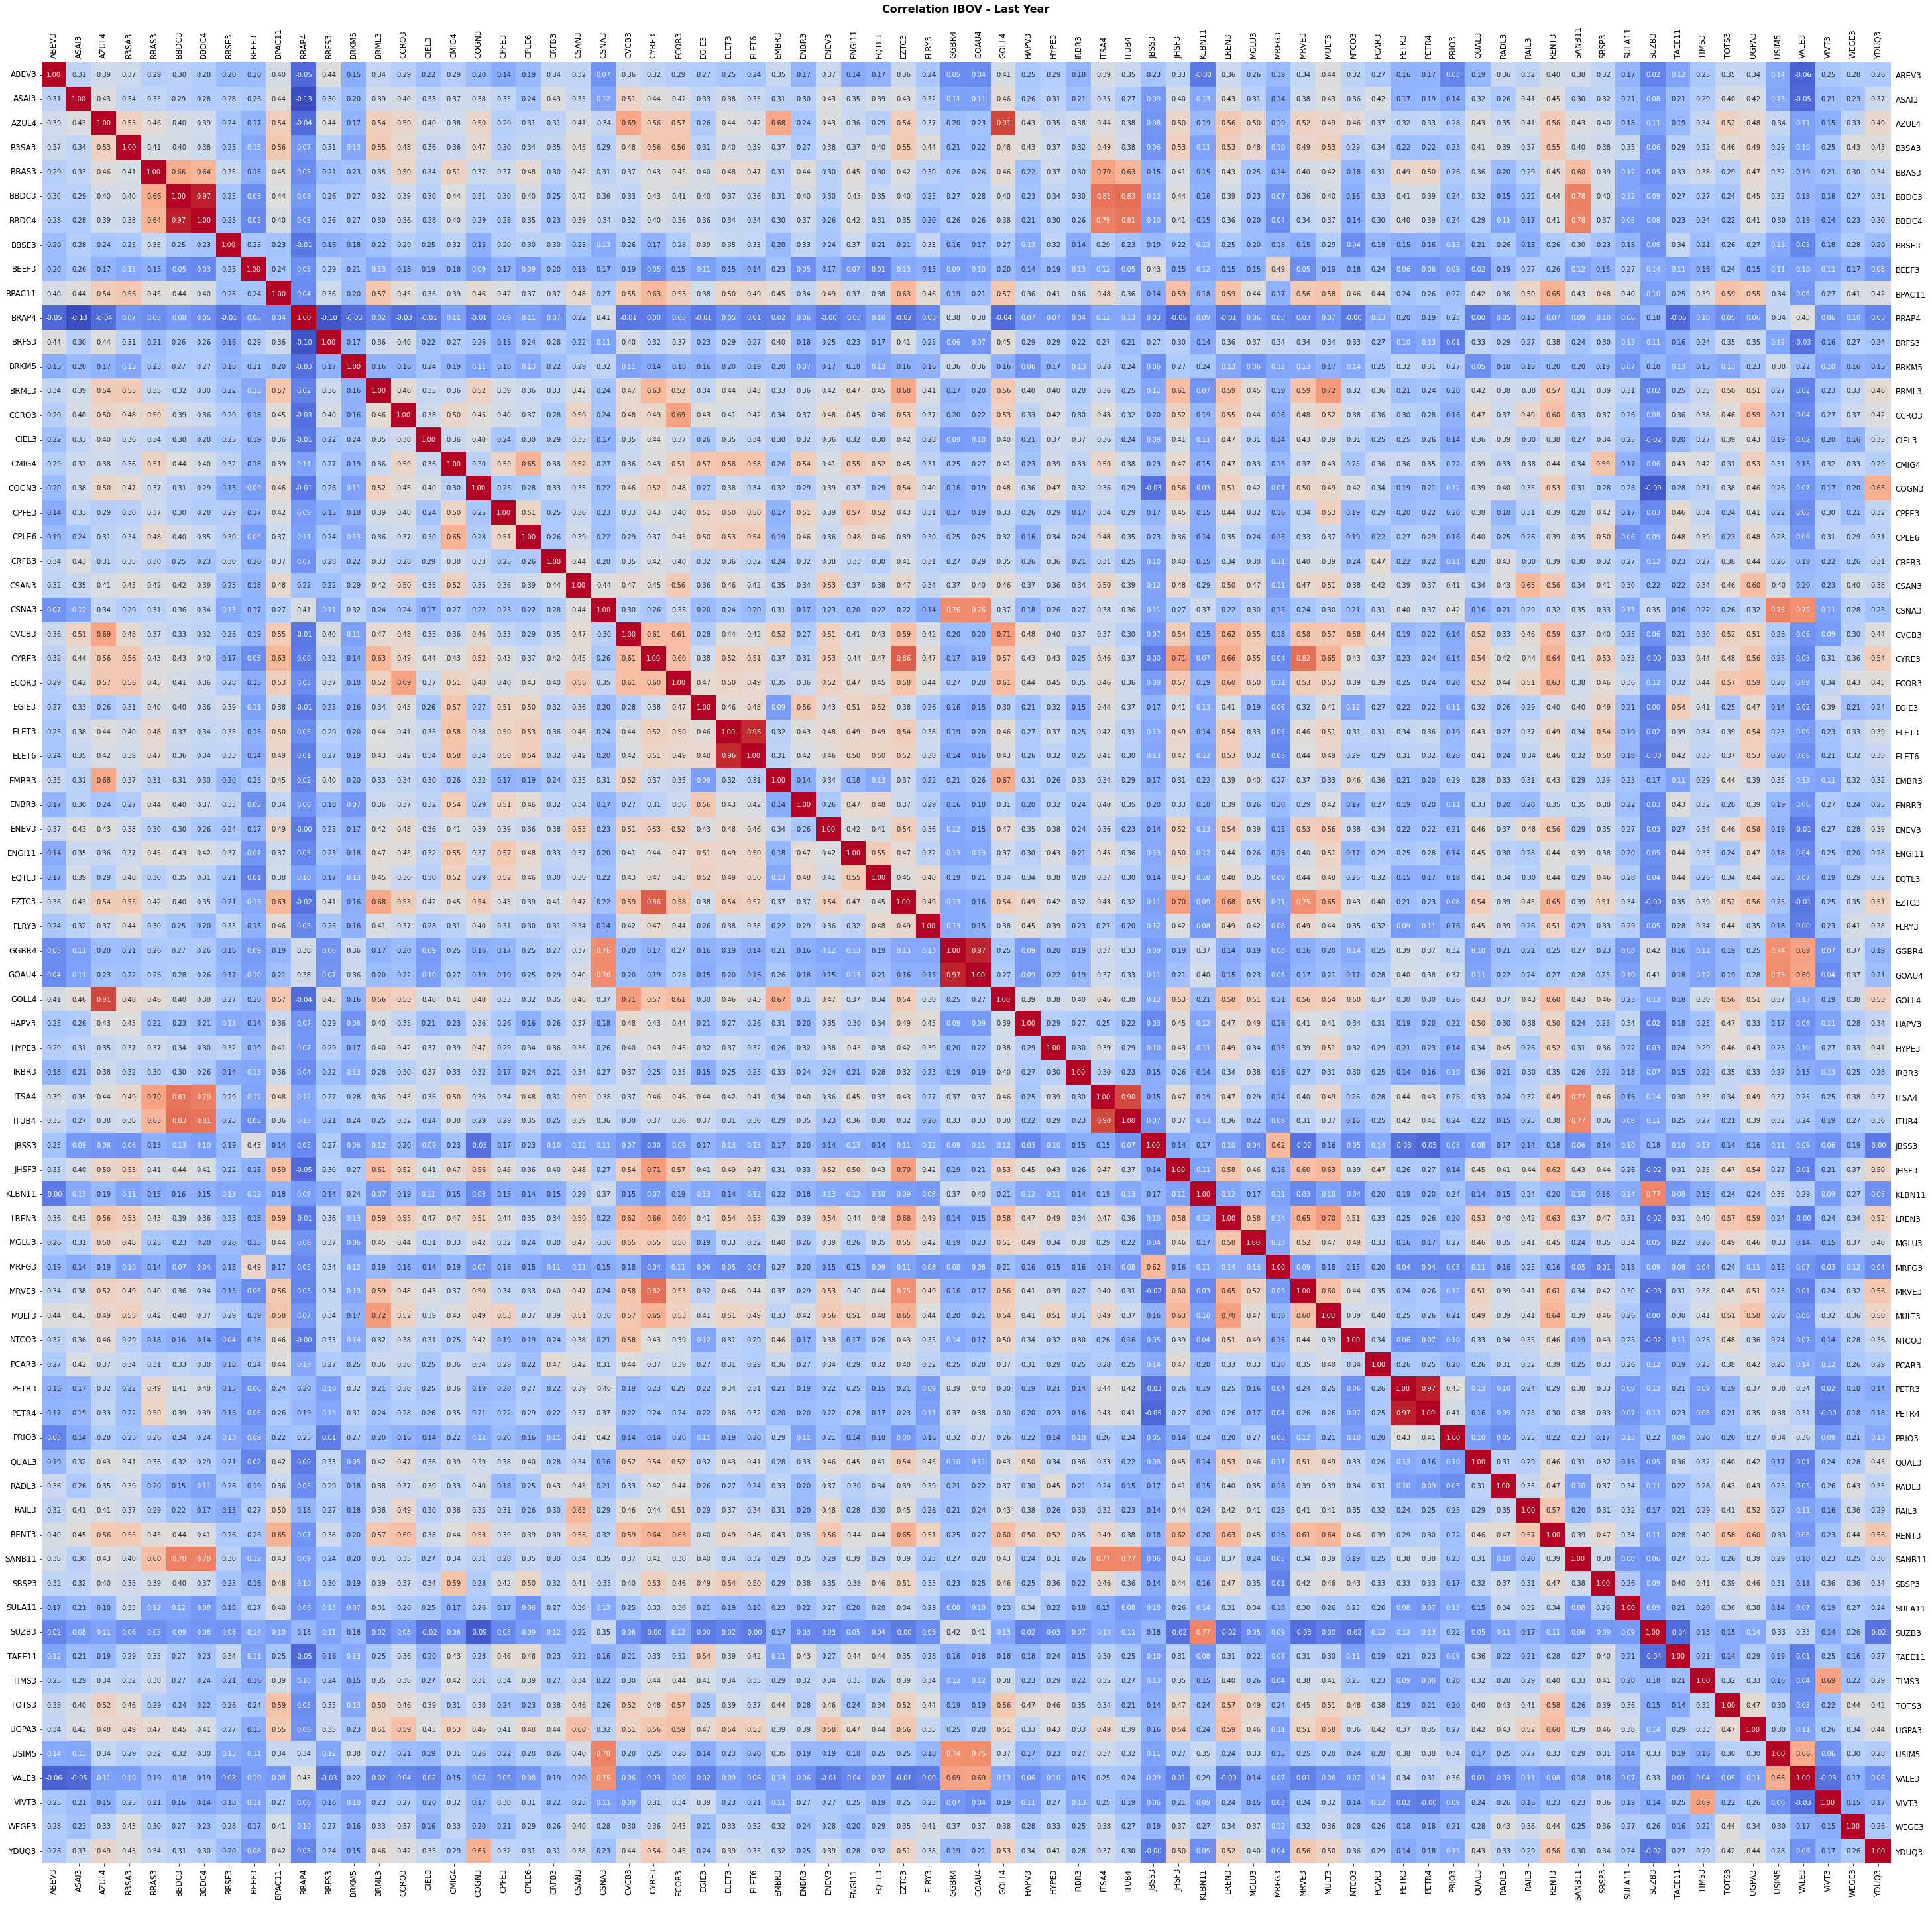

In [115]:
plt.figure(figsize=(50,50))
plt.title('Correlation IBOV - Last Year', fontsize=16, pad=20, fontweight=600)
ax = sns.heatmap(corr, annot=True, cbar=False, cmap='coolwarm', fmt='.2f', )
ax.tick_params(axis = "y", labelright =True, labelrotation=0, labelsize='large')
ax.tick_params(axis = "x", labeltop =True, labelrotation=90, labelsize='large' )

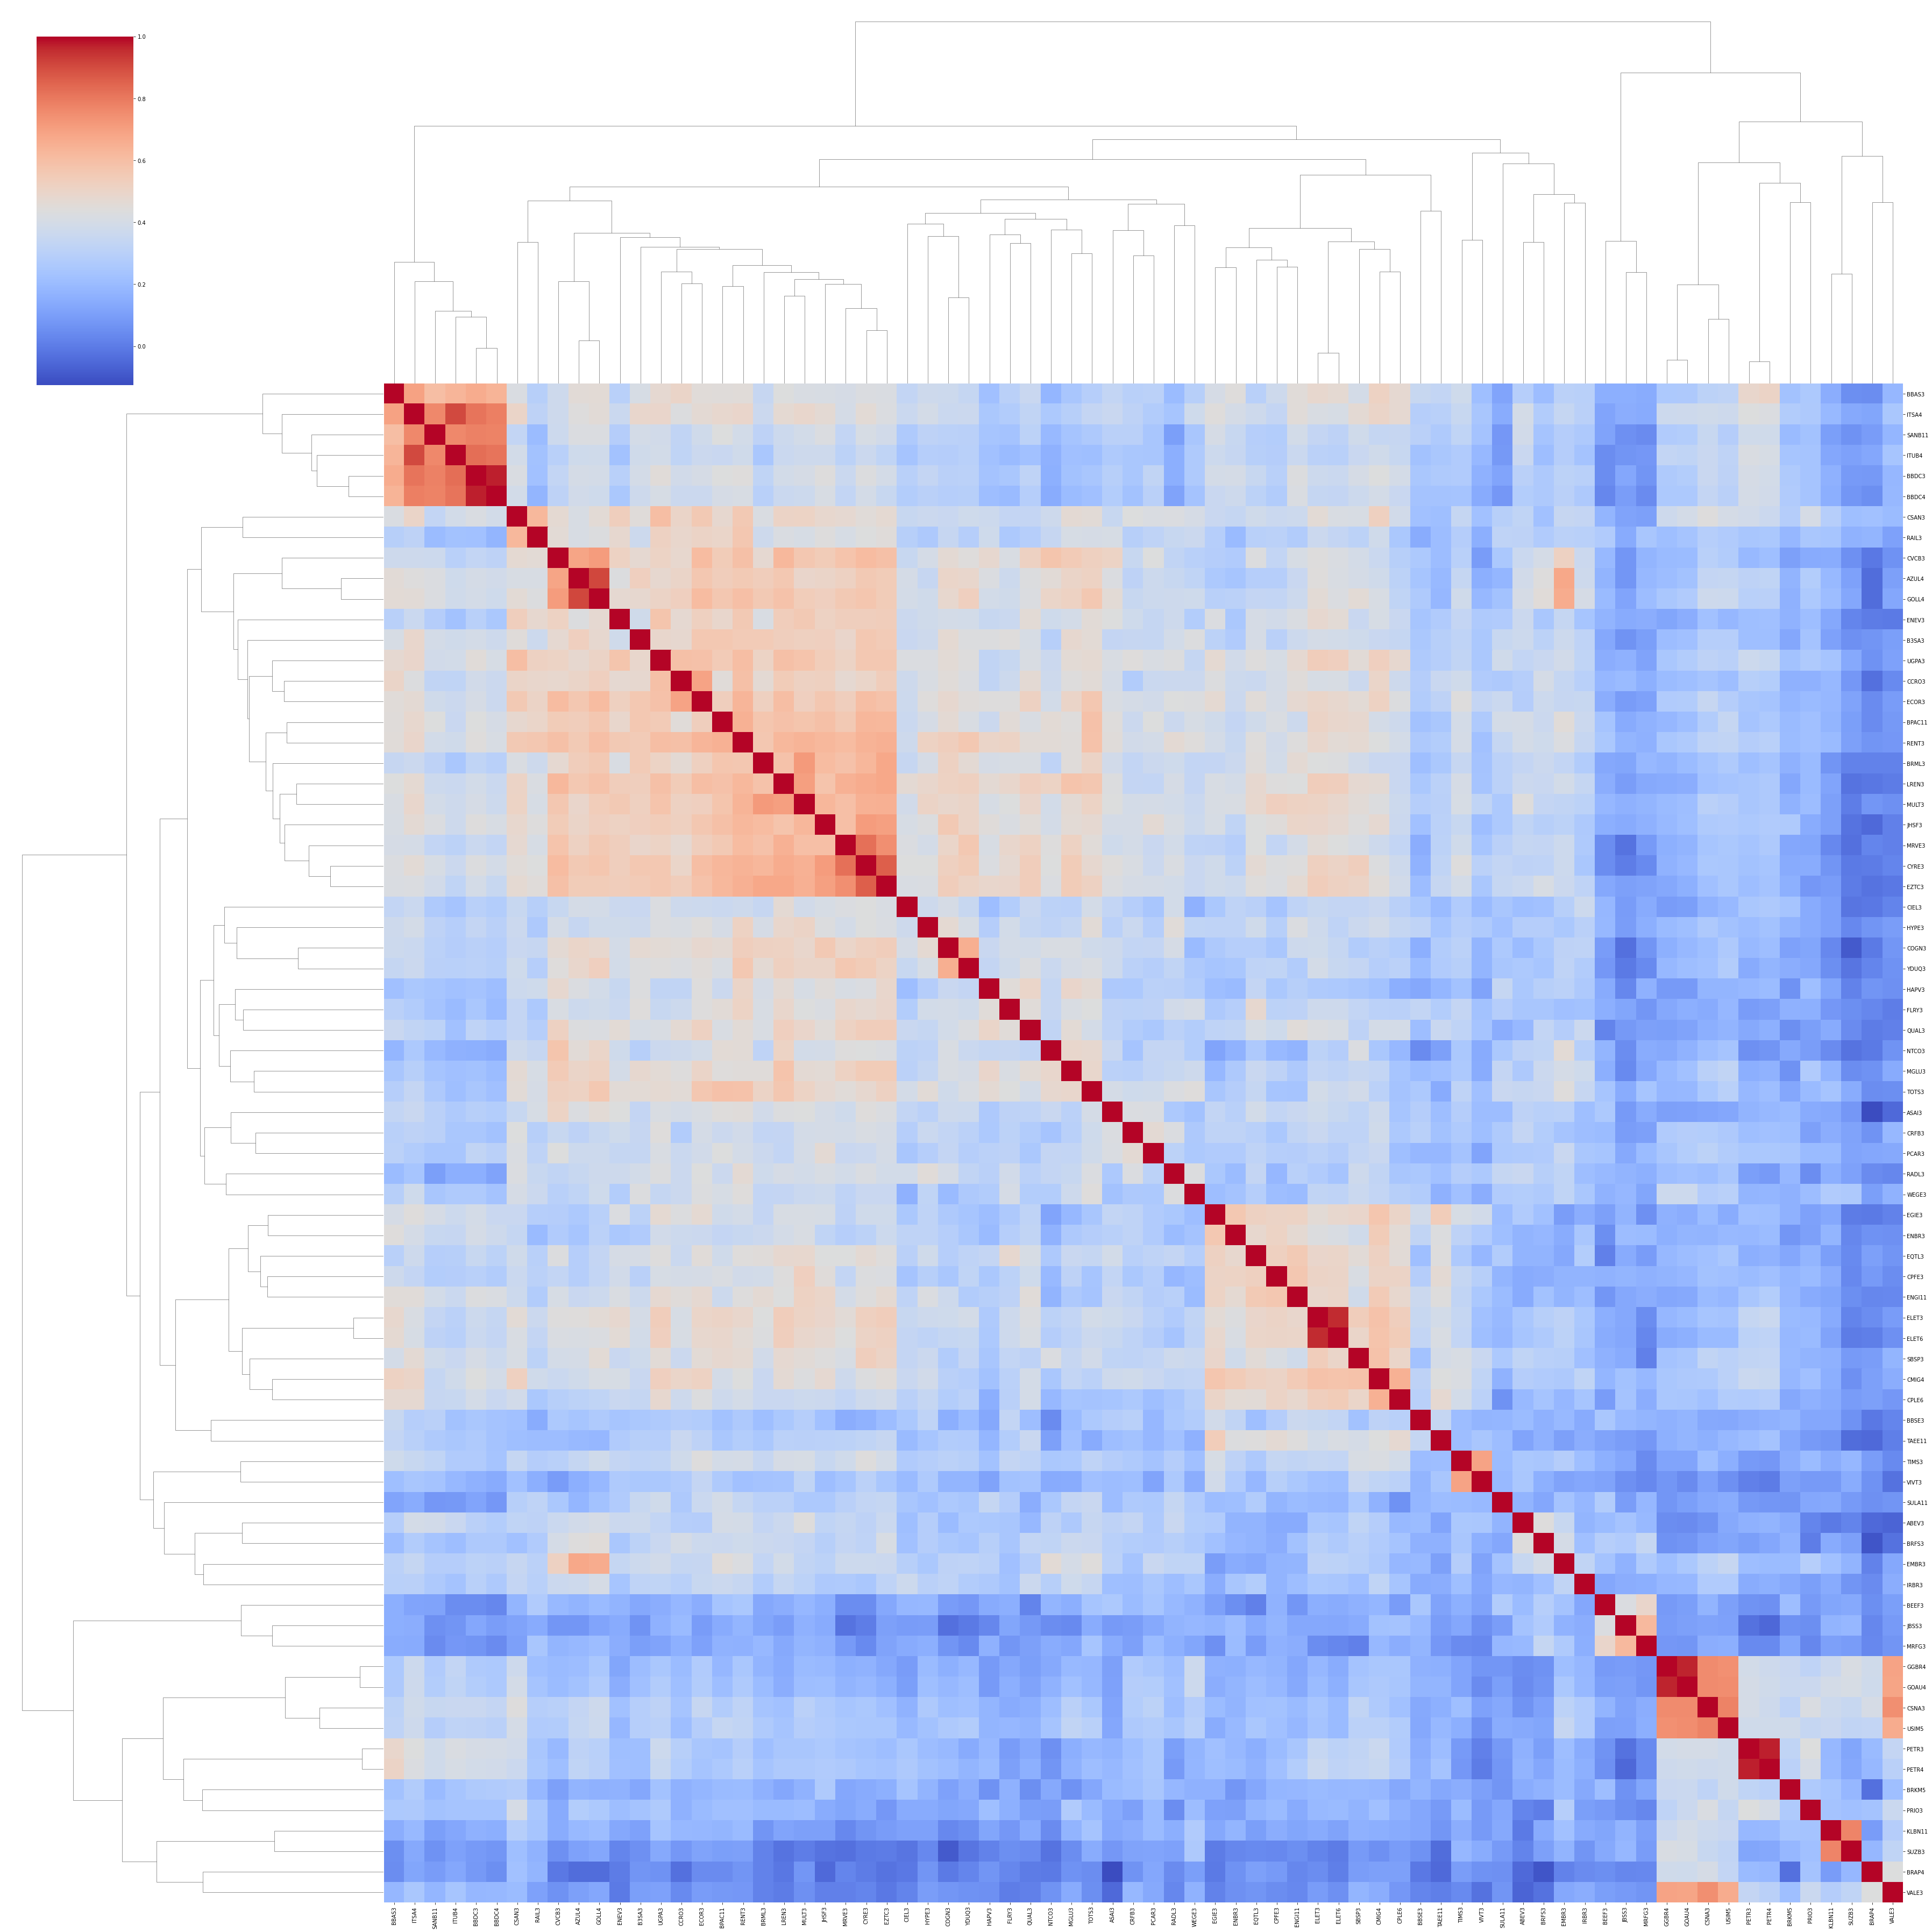

In [116]:
# Clustermap
sns.clustermap(corr, 
               annot=False, 
               cbar=True, 
               cmap='coolwarm',
              figsize=(50,50))

In [ ]:
companies = corr.mean().sort_values(ascending=False)

fig  = px.bar(x=companies, y=companies.index, orientation='h', text=round(companies, 2))

fig.layout.title = "Mean Correlation"
fig.layout.xaxis.title = ""
fig.layout.yaxis.title = ""
fig.layout.xaxis.side = 'top'

fig.layout.height = 1400

fig.show()

In [ ]:
# list of tickers
tickers

['RRRP3',
 'ALPA4',
 'ABEV3',
 'AMER3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BPAN4',
 'BBSE3',
 'BRML3',
 'BBDC3',
 'BBDC4',
 'BRAP4',
 'BBAS3',
 'BRKM5',
 'BRFS3',
 'BPAC11',
 'CRFB3',
 'CCRO3',
 'CMIG4',
 'CIEL3',
 'COGN3',
 'CPLE6',
 'CSAN3',
 'CPFE3',
 'CMIN3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENGI11',
 'ENEV3',
 'EGIE3',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'NTCO3',
 'SOMA3',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'RENT3',
 'LWSA3',
 'LREN3',
 'MGLU3',
 'MRFG3',
 'CASH3',
 'BEEF3',
 'MRVE3',
 'MULT3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PRIO3',
 'PETZ3',
 'POSI3',
 'QUAL3',
 'RADL3',
 'RAIZ4',
 'RDOR3',
 'RAIL3',
 'SBSP3',
 'SANB11',
 'SMTO3',
 'CSNA3',
 'SLCE3',
 'SULA11',
 'SUZB3',
 'TAEE11',
 'VIVT3',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VIIA3',
 'VBBR3',
 'WEGE3',
 'YDUQ3']